In bash do this
```bash
docker run --name ubvnc -p 6080:80 -p 5900:5900 -v /dev/shm:/dev/shm dorowu/ubuntu-desktop-lxde-vnc
```

You can view the vnc in the browser with js noVNC at port 6080 or connect over python/other vnc app at port 5900. 

More information:
- https://stackoverflow.com/questions/40658095/how-to-open-ubuntu-gui-inside-a-docker-image
- https://github.com/fcwu/docker-ubuntu-vnc-desktop

In [73]:
import time
import threading
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from ipywidgets import Video
import pandas as pd
import seaborn as sns

from pyVNC.Client import Client
from pyVNC import rfb, constants

## Utils

In [2]:
def move_mouse(vnc, x, y):
    if x > vnc.screen.size[0]:
        x = vnc.screen.size[0]
    if y > vnc.screen.size[1]:
        y = vnc.screen.size[1]
    
    vnc.screen.protocol.pointer_event(x, y, 0)

In [3]:
def make_animation(arr, name):
    fig = plt.figure()
    #plt.axis('off')
    im = plt.imshow(arr[0], animated=True)
    def updatefig(i):
        if (i<99):
            i += 1
        else:
            i = 0
        im.set_array(arr[i])
        return im,
    ani = animation.FuncAnimation(fig, updatefig,  frames=arr.shape[0]-1, blit=True)
    fname = 'recordings/{}.mp4'.format(name)
    ani.save(fname)
    plt.gcf().clear()
    display.display(Video.from_file(fname))
    
arr = np.random.rand(30, 64, 64, 3)
make_animation(arr, 'test')

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x14D}mdat\x00\x00\…

<Figure size 432x288 with 0 Axes>

In [7]:
def auto_test(vnc, fn, num_frames=100):
    frames = []
    for i in range(num_frames):
        frames.append(vnc.screen.get_array())
        fn(vnc, i)
    frames = np.array(frames)
    make_animation(frames, fn.__name__)

## 0.0.0

Learned how to connect to the docker container with pyVNC and view the screen

In [2]:
vnc = Client(host='127.0.0.1',
             password=None,
             port=5900,
             depth=32,
             fast=True,
             shared=True)

In [3]:
vnc.start()

In [5]:
vnc.has_gui

False

In [6]:
vnc.port, vnc.host, vnc.password

(5900, '127.0.0.1', None)

In [14]:
s=vnc.screen # Get a array representation of the screen shape: (?, ?, 3)
arr=s.get_array() # Get a numpy array representation of the screen shape: (?, ?, 3)
arr.shape # (768, 1024, 3) for my connection

(768, 1024, 3)

In [19]:
vnc.send_key('k')

In [31]:
s.size

(1024, 768)

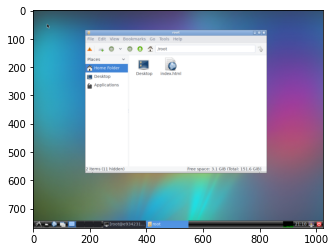

In [26]:
plt.imshow(vnc.screen.get_array())

In [25]:
def move_mouse(vnc, x, y):
    if x > vnc.screen.size[0]:
        x = vnc.screen.size[0]
    if y > vnc.screen.size[1]:
        y = vnc.screen.size[1]
    
    vnc.screen.protocol.pointer_event(x, y, 0)

move_mouse(vnc, 50, 50)

In [ ]:
vnc.join()

## 0.0.1

Learned how to make the GUI appear for manual control. Does not work simultaneously with pyVNC API calls. 

In [34]:
vnc = Client(host='127.0.0.1',
             password=None,
             port=5900,
             depth=32,
             gui=True,
             fast=True,
             shared=True)

In [36]:
vnc.getName()

'Thread-6'

In [37]:
vnc.start()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/pyVNC/Client.py", line 105, in run
    self.run_block()
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/pyVNC/Client.py", line 102, in run_block
    reactor.run(installSignalHandlers=False)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/internet/base.py", line 1282, in run
    self.startRunning(installSignalHandlers=installSignalHandlers)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/internet/base.py", line 1262, in startRunning
    ReactorBase.startRunning(self)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/internet/base.py", line 763, in startRunning
    raise error.ReactorAlreadyRunning()
twisted.internet.error.ReactorAlreadyRunning


115
117
100
111
32
97
112
116
32
103


## 0.0.2

Tested iteration speed of pyVNC API calls.

In [5]:
vnc = Client(host='127.0.0.1',
             password=None,
             port=5900,
             depth=32,
             gui=False,
             fast=True,
             shared=True)
vnc.start()

In [6]:
def move_mouse_auto(vnc, i):
    move_mouse(vnc, 3*i, 2*i)

auto_test(vnc, move_mouse_auto)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00N\xdbmdat\x00\x…

<Figure size 432x288 with 0 Axes>

In [8]:
def move_mouse_and_keypress(vnc, i):
    move_mouse(vnc, 3*i, 2*i)
    vnc.send_key('a' if i % 2 == 0 else 'b')

auto_test(vnc, move_mouse_and_keypress)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00P\x0bmdat\x00\x…

<Figure size 432x288 with 0 Axes>

Clipboard: b'ababababab'


In [53]:
def test3(vnc, i):
    vnc.send_key('k')
    vnc.send_mouse('Left', (5*i, 4*i))

auto_test(vnc, test3)

Clipboard: b'\n'


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00S\xcbmdat\x00\x…

<Figure size 432x288 with 0 Axes>

In [9]:
start = time.time_ns()
prev = start

def timed_test(vnc, i):
    global start, prev

    move_mouse(vnc, 3*i, 2*i)

    now = time.time_ns()
    print('{}: {} {}'.format(i, (now - start)/1000, (now - prev)/1000))
    prev = now

auto_test(vnc, timed_test)

0: 266.166 266.166
1: 522.076 255.91
2: 693.887 171.811
3: 728.297 34.41
4: 757.428 29.131
5: 784.993 27.565
6: 811.84 26.847
7: 839.097 27.257
8: 867.178 28.081
9: 893.969 26.791
10: 920.683 26.714
11: 948.284 27.601
12: 974.883 26.599
13: 1001.048 26.165
14: 1054.544 53.496
15: 1085.11 30.566
16: 1111.985 26.875
17: 1140.074 28.089
18: 1166.779 26.705
19: 1193.509 26.73
20: 1220.339 26.83
21: 1246.836 26.497
22: 1274.431 27.595
23: 1300.981 26.55
24: 1327.093 26.112
25: 1353.652 26.559
26: 12490.509 11136.857
27: 12582.467 91.958
28: 12608.439 25.972
29: 12630.514 22.075
30: 12652.121 21.607
31: 12673.497 21.376
32: 12694.447 20.95
33: 12715.42 20.973
34: 12736.124 20.704
35: 12757.366 21.242
36: 12778.315 20.949
37: 12798.837 20.522
38: 12819.251 20.414
39: 12843.335 24.084
40: 12863.286 19.951
41: 12881.672 18.386
42: 12899.869 18.197
43: 12919.132 19.263
44: 13081.313 162.181
45: 13108.867 27.554
46: 13134.417 25.55
47: 13158.172 23.755
48: 13180.85 22.678
49: 13370.322 189.472
50

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00O\xaamdat\x00\x…

<Figure size 432x288 with 0 Axes>

In [11]:
seconds = 44052.195 / 1000 / 1000
frames = 100
fps = frames / seconds
fps

2270.0344443676418

That's a good framerate for reinforcement learning. It'll probabbly be faster than the model, but still at a rate where asynchronous updates are relevant. I should also test:
- more commands (mouse click, key press)
- sparse commands (mouse click, key press)
- larger display

In [12]:
start = time.time_ns()
prev = start

def timed_test(vnc, i):
    global start, prev

    move_mouse(vnc, 3*i, 2*i)
    if i == 10:
        vnc.send_key('h')
    if i == 20:
        vnc.send_key('e')
    if i == 30:
        vnc.send_key('l')
    if i == 45:
        vnc.send_key('l')
    if i == 84:
        vnc.send_key('o')

    now = time.time_ns()
    print('{}: {} {}'.format(i, (now - start)/1000, (now - prev)/1000))
    prev = now

num_frames = 120
auto_test(vnc, timed_test, num_frames=num_frames)
print(f'fps={num_frames/((prev-start)/1e6)}')

0: 4657.227 4657.227
1: 4799.026 141.799
2: 4839.649 40.623
3: 4875.5 35.851
4: 4907.931 32.431
5: 4940.711 32.78
6: 4974.174 33.463
7: 5004.335 30.161
8: 5035.933 31.598
9: 5069.068 33.135
10: 7634.218 2565.15
11: 7815.928 181.71
12: 8555.448 739.52
13: 11631.65 3076.202
14: 12061.494 429.844
15: 12726.43 664.936
16: 51393.671 38667.241
17: 51472.388 78.717
18: 51502.762 30.374
19: 51528.815 26.053
20: 52680.257 1151.442
21: 52846.809 166.552
22: 52878.367 31.558
23: 52904.263 25.896
24: 53205.192 300.929
25: 53241.425 36.233
26: 53272.932 31.507
27: 53303.846 30.914
28: 53331.967 28.121
29: 53360.489 28.522
30: 54526.637 1166.148
31: 54648.564 121.927
32: 54692.235 43.671
33: 54744.54 52.305
34: 56101.887 1357.347
35: 56175.657 73.77
36: 56232.426 56.769
37: 56288.19 55.764
38: 56338.438 50.248
39: 56389.473 51.035
40: 56440.079 50.606
41: 56489.343 49.264
42: 56537.79 48.447
43: 56573.009 35.219
44: 56604.648 31.639
45: 58342.898 1738.25
46: 58477.692 134.794
47: 58508.3 30.608
48: 

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00Y\xaamdat\x00\x…

fps=1.828886986473872


<Figure size 432x288 with 0 Axes>

Unhandled Error
Traceback (most recent call last):
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/python/log.py", line 103, in callWithLogger
    return callWithContext({"system": lp}, func, *args, **kw)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/python/log.py", line 86, in callWithContext
    return context.call({ILogContext: newCtx}, func, *args, **kw)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/python/context.py", line 122, in callWithContext
    return self.currentContext().callWithContext(ctx, func, *args, **kw)
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/python/context.py", line 85, in callWithContext
    return func(*args,**kw)
--- <exception caught here> ---
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/twisted/internet/posixbase.py", line 614, in _doReadOrWrite
    why = selectable.doRead()
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8

The VNC server can't keep up with
- command speed
- display size

In [14]:
cmd = '14-54'
for k in cmd:
    vnc.send_key(k)
eval(cmd)

-40

In [26]:
vnc.send_key(constants.K_BACKSPACE)
vnc.send_key(constants.K_RETURN)

## 0.0.3 Calculator Benchmark

In [35]:
def calculator_benchmark(cmd, delay=1e-6):
    times = []

    cmds = list(cmd)
    cmds.insert(0, constants.K_ESCAPE)
    cmds.append(constants.K_RETURN)

    for k in cmds:
        vnc.send_key(k)

        time.sleep(delay)
        times.append(time.time_ns())
    
    print(f'cmd = {eval(cmd)}')

    return pd.DataFrame(times)

df = calculator_benchmark('14-54', 1e-5)

cmd = -40


In [75]:
H = int(1e9)
L = -H

df = calculator_benchmark('11234567890', 1e-6)
df = calculator_benchmark(f'{random.randint(L,H)}', 1e-6)
df = calculator_benchmark('31234567890', 1e-6)
df = calculator_benchmark(f'{random.randint(L,H)}', 1e-6)
df = calculator_benchmark('41234567890', 1e-6)
df = calculator_benchmark(f'{random.randint(L,H)}', 1e-6)
df = calculator_benchmark('51234567890', 1e-6)
df = calculator_benchmark(f'{random.randint(L,H)}', 1e-6)
df = calculator_benchmark('69876543210', 1e-6)

cmd = 11234567890
cmd = -538602970
cmd = 31234567890
cmd = -619113245
cmd = 41234567890
cmd = -559983320
cmd = 51234567890
cmd = 664060441
cmd = 69876543210


In [76]:
cmd = '123456-7890*123/456+7890'
df = calculator_benchmark(cmd, 1e-5)
df

cmd = 129217.77631578948


,0
0,1635979621885544637
1,1635979621886777754
2,1635979621888264530
3,1635979621890412680
4,1635979621891910991
5,1635979621893397816
6,1635979621894911484
7,1635979621896325849
8,1635979621897749670
9,1635979621899172512
